In [3]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
samples, Fs = sf.read('123.ogg')

In [5]:
Fc = 16000

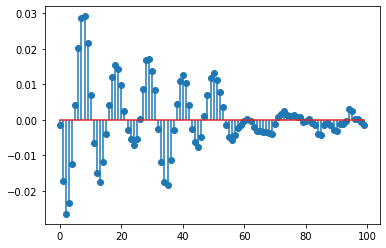

In [6]:
#%matplotlib widget
plt.stem(samples[:100])
plt.show()

In [24]:
def spectre(samples):
    %matplotlib widget
    for s in samples:
        plt.plot(np.linspace(-Fs/2, Fs/2, len(s)), np.fft.fftshift(20*np.log10(np.abs(np.fft.fft(s)))))
    plt.savefig('spectre.png')
    plt.show()

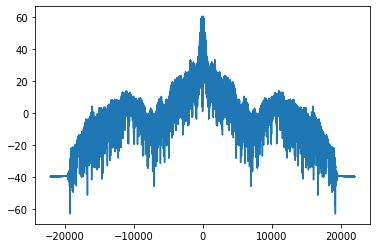

In [8]:
#%matplotlib widget
spectre1 = np.fft.fft(samples)
# plt.stem(np.linspace(-Fs/2, Fs/2, len(samples)), np.fft.fftshift(20*np.log10(np.abs(spectre))), use_line_collection=True)
plt.plot(np.linspace(-Fs/2, Fs/2, len(samples)), np.fft.fftshift(20*np.log10(np.abs(spectre1))))
plt.show()

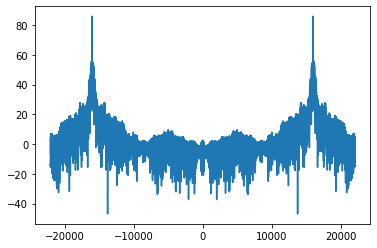

In [9]:
samples2 = np.real((1+samples) * np.exp(1j * np.arange(0, len(samples)) * 2 * np.pi * Fc / Fs))
#%matplotlib widget
spectre2 = np.fft.fft(np.real(samples2))
# plt.stem(np.linspace(-Fs/2, Fs/2, len(samples)), np.fft.fftshift(20*np.log10(np.abs(spectre))), use_line_collection=True)
plt.plot(np.linspace(-Fs/2, Fs/2, len(samples)), np.fft.fftshift(20*np.log10(np.abs(spectre2))))
plt.show()

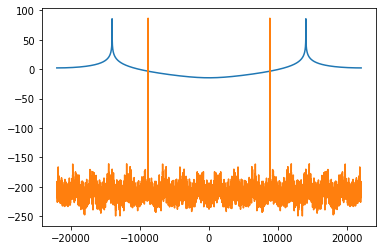

In [10]:
samples3 = np.exp(1j * np.arange(0, len(samples)) * 2 * np.pi * 1 / np.pi)
#%matplotlib widget
spectre3 = np.fft.fft(np.real(samples3))
# plt.stem(np.linspace(-Fs/2, Fs/2, len(samples)), np.fft.fftshift(20*np.log10(np.abs(spectre))), use_line_collection=True)
plt.plot(np.linspace(-Fs/2, Fs/2, len(samples)), np.fft.fftshift(20*np.log10(np.abs(spectre3))))
samples3 = np.exp(1j * np.arange(0, len(samples)) * 2 * np.pi * 1 / 5)
spectre3 = np.fft.fft(np.real(samples3))
plt.plot(np.linspace(-Fs/2, Fs/2, len(samples)), np.fft.fftshift(20*np.log10(np.abs(spectre3))))
plt.show()

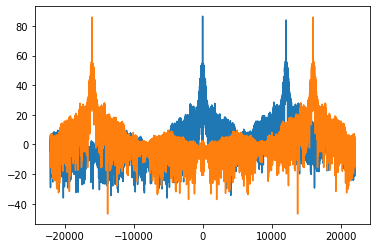

In [11]:
samples4 = np.real(samples2) * np.exp(-1j * np.arange(0, len(samples)) * 2 * np.pi * Fc/Fs)
spectre([samples4, samples2])

In [12]:
import scipy.signal as sg

In [13]:
b,a = sg.iirdesign(4000, min(2*Fc, Fs-2*Fc)-4000, 1, 60, fs=Fs)

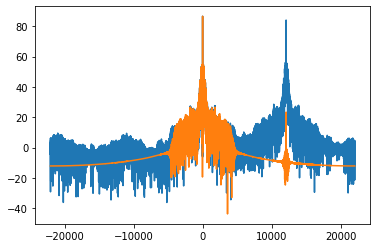

In [14]:
samples5 = sg.lfilter(b, a, samples4)
spectre([samples4, samples5])

In [15]:
hpf = sg.iirdesign(100, 50, 1, 60, fs=Fs)

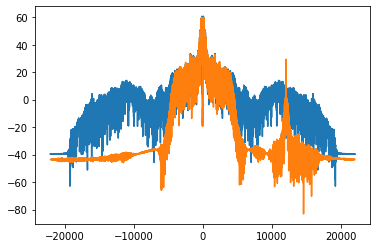

In [16]:
samples6 = sg.lfilter(*hpf, samples5*2)
spectre([samples, samples6])

In [2]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sg


In [3]:
samples, Fs = sf.read('output_transmitter.flac')
Fc = 16000
print(Fc/Fs)

0.36281179138321995


In [4]:
def mult_by_exp(samples, Fc, Fs):
    return samples*np.exp(-1j * np.arange(0, len(samples)) * 2 * np.pi * Fc / Fs)

In [5]:
# def diff(sample):
#     res = np.array([])
#     for i in range(len(sample)-1):
#         np.append(res, sample[i+1] - sample[i])
#     return res

In [6]:
def fix_diff(sample):
    res = np.zeros(len(sample))
    for i in range(len(sample)):
        if sample[i] > np.pi:
            res[i] = sample[i] - 2 * np.pi
        elif sample[i] < -np.pi:
            res[i] = sample[i] + 2 * np.pi
        else:
            res[i] = sample[i]
    return res

In [7]:
def amplify(sample, div, Fs):
    return sample * Fs/div

In [20]:
s1 = mult_by_exp(samples, 7000, Fs)
b,a = sg.iirdesign(4000, min(2*Fc, Fs-2*Fc)-4000, 1, 60, fs=Fs)
s2 = sg.lfilter(b, a, s1)
s3 = np.angle(s2)
s4 = np.diff(s3)
s5 = fix_diff(s4.copy())
s6 = amplify(s5, 1e3, Fs)/2/np.pi


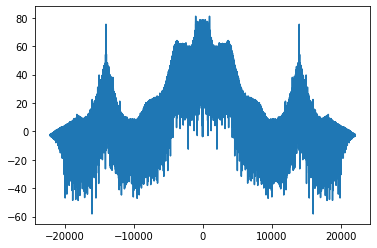

In [25]:
spectre([s6])

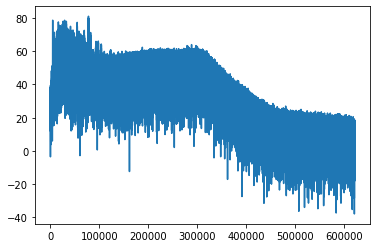

In [18]:
# sp6 = np.fft.fft(np.real(s6))
plt.plot(20*np.log10(np.abs(np.fft.fft(s6)))[:int(len(s6)/Fs*8000)])
plt.savefig("minus.png")
plt.show()

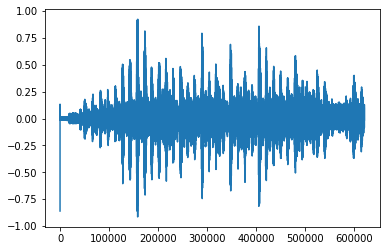

In [16]:
plt.plot(s6[:int(len(s6)/Fs*8000)]/2/np.pi)
plt.savefig("s.png")
plt.show()

In [19]:
import sounddevice as sd
sd.play(s6[:Fs*4], Fs)